# Import librarise

In [98]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import joblib

# Simple Linear Regression

In [99]:
housing_price_df = pd.read_csv("../../../dataset/Housing.csv")
housing_price_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [100]:
housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [101]:
housing_price_df_int = housing_price_df[["price", "area","bedrooms", "bathrooms","stories", "parking"]]
housing_price_df_int.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


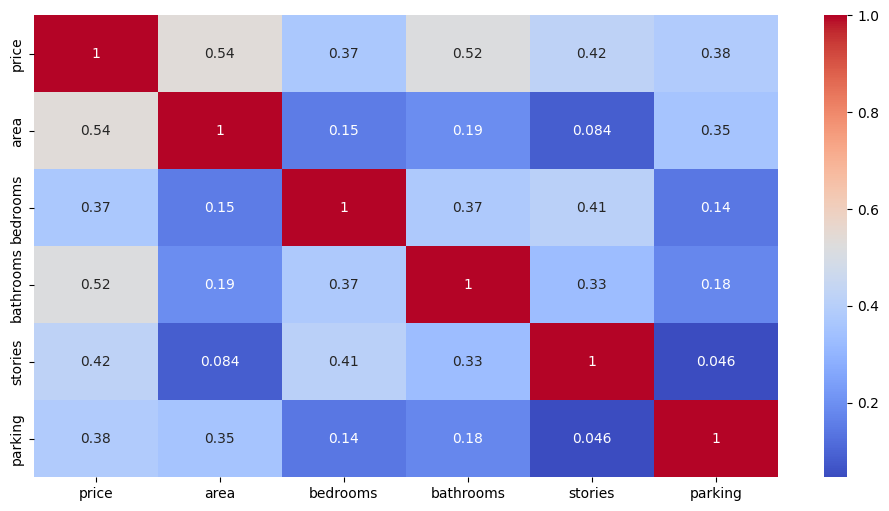

In [102]:
plt.figure(figsize=(12, 6)) #Create canvas
sns.heatmap(housing_price_df_int.corr(), annot= True, cmap="coolwarm") # annot(True) hiddend number   cmap is bang mau
plt.show() 

In [103]:
X = housing_price_df_int[["area","bedrooms", "bathrooms","stories", "parking"]]
y = housing_price_df_int["price"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [105]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking
46,6000,3,2,4,1
93,7200,3,2,1,3
335,3816,2,1,1,2
412,2610,3,1,2,0
471,3750,3,1,2,0


In [106]:
#Linear_model = LinearRegression()
#Linear_model.fit(X_train, y_train)
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression()) #degree (hyperparameter)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_pred

array([ 6505190.05048829,  6264935.3494791 ,  3379732.27674085,
        4313632.07963849,  3609277.6131051 ,  4685697.12146257,
        5823994.6846314 ,  5292998.0316094 ,  3206392.32135927,
        2914176.44318405,  9825037.66296401,  3332212.5306203 ,
        3233522.58046939,  3511081.06340042,  3914600.77022639,
        5866143.0303738 ,  3050839.02342074,  5184429.86386496,
        5139062.53415363,  4095558.06870587,  5862354.49233057,
        4714550.46860006,  3199965.92154993,  4337676.94440375,
        5470818.02211049,  7523437.19917141,  2921604.12517187,
        4194563.11970318,  5572998.35065263,  3547371.0587844 ,
        4788112.88355072,  3997198.09685666,  6114431.17398441,
        4767516.27559593,  4175903.47100783,  5597265.03018334,
        4784476.29569902,  3412292.21690245,  3359533.31201855,
        3942932.95808042,  5706450.79077278,  3190917.20452644,
        6242205.87386384,  4520586.14489569,  4287735.91945767,
        4351331.96472959,  6858617.26702

In [107]:
#y_pred = Linear_model.predict(X_test)
#y_pred

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [109]:
mae = mean_absolute_error(y_test, y_pred) #y_test gia tri thuc, y_pre cho danh gia
mse = mean_squared_error(y_test, y_pred) # loss model (*) > mae = dao ham () -> Xác định một biến nó tăng/ giảm ở một thời điểm nhất định 
rmse = np.sqrt(mse) # root mean square
r2 = r2_score(y_test, y_pred) #r2 = accuracy model (*) => Linear best

In [110]:
print(f"MAE: {mae}")

MAE: 1111158.8111749077


In [111]:
print(f"MSE: {mse}")

MSE: 2326140709885.0474


In [112]:
print(f"RMSE: {rmse}")

RMSE: 1525169.075835544


In [113]:
print(f"Model Accuracy: {r2}")  

Model Accuracy: 0.5397945628393792


In [116]:
def predict_price(area_m2, bedroom_m2, bathrooms_m2, stories_m, parking_m):
    X_new = pd.DataFrame({"area": [area_m2], "bedrooms": [bedroom_m2], "bathrooms": [bathrooms_m2],  "stories": [stories_m], "parking": [parking_m]}) # fit col[area] 
    return pipe.predict(X_new) # print array, had [0] or item()
print(predict_price(7420, 4,2,3,2))

# 13300000	7420	4	2	3	2 


[7558839.86142254]


=> Accuracy quá thấp cho nên kết quả cho mô hình này không tối ưu